## Homework 3.2: Error-prone PCR (30 pts)

<hr>

A common method of generating diversity in a library is error-prone PCR (ePCR). In this problem, you will simulate ePCR.

## Part a

Write a function that will produce a mutated nucleic acid function. The function should take as inputs the parent nucleic acid sequence (as a string) and the number of bases to be mutated. It should return the mutated version of the nucleic acid sequence. Assume that each location is equally likely to be mutated and that, when mutating, each nucleotide is equally likely to be replaced by any other nucleotide. 

The function has the following call signature/doc string.

In [1]:
import numpy as np

def mutate(sequence, n_mutations):
    """Mutate a given sequence `n_mutations` times.
    
    Parameters
    ----------
    sequence : str
        The original sequence. 
    n_mutations : int 
        The number bases to be mutated. 
        
    Returns
    -------
    output : str
        The mutated sequence.
    """
    nt_list = 'ACGT'
    positions = np.random.randint(0, len(sequence), n_mutations)
    
    for p in positions:
        nt = np.random.choice(list(nt_list))
        if nt == sequence[p]:
            nt = np.random.choice(list(nt_list.replace(nt, '')))
        sequence = sequence[:p] + nt + sequence[p+1:]

    return sequence


In [2]:
# check mutatee fxn
seq = "ATGGGCTTCGACGAGCTGGCTAAAGGAGCCGTGGTGCCAGAAGACCACTTT"

print(mutate(seq, 3))

ATGGGCTCCGACGAGCTGGCTAAAGGAGACGTGGTGCCAGAAGACCACATT


## Part b

In real ePCR mutagenesis libraries, the experimenter cannot set the exact number of nucleotide substitutions. Instead, the number of nucleotide substitutions per sequence follows a Poisson distribution,

\begin{align}
f(x) = \frac{\lambda^x}{x!}\,\mathrm{e}^{-\lambda},
\end{align}
        
where $\lambda$ is the mean number of nucleotide substitutions in the library and $x$ is the number of nucleotide substitutions. 

For a library of 10,000 variants with an average of 4 nucleotide mutations per variant, plot the expected number of sequences with $\{0, 1, 2, \ldots, 10\}$ nucleotide mutations.

<hr>

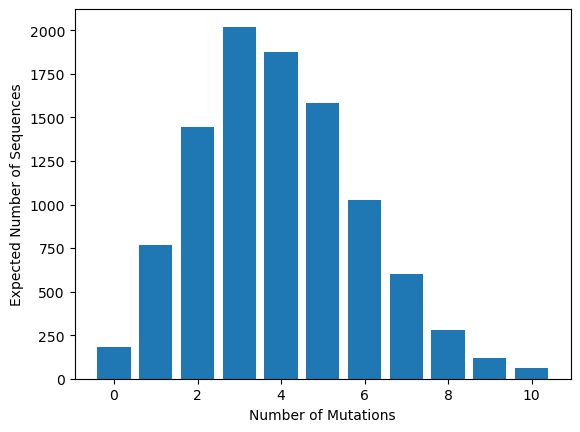

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

v = 10000
lamb = 4

x = poisson.rvs(lamb, size = v).tolist()

# get count of each  item in list x
xy = {}
for i in x:
    if i <= 10:
        if i in xy:
            xy[i] += 1
        else:
            xy[i] = 1

plt.bar(xy.keys(), xy.values())
plt.xlabel('Number of Mutations')
plt.ylabel('Expected Number of Sequences')
plt.show()

## Part c

Consider the nucleic acid sequence below.

In [4]:
seq = (
    "ATGGGCTTCGACGAGCTGGCTAAAGGAGCCGTGGTGCCAGAAGACCACTTT"
    "GTCTGCGGACCAGCCGACAAGTGCTATTGCTCCGCTTGGCTGCACAGCAGA"
    "GGCACACCAGGAGAAAAGATCGGCGCCCAGGTCTGCCAGTGGATTGCTTTC"
    "AGCATCGCCATCGCCCTGCTGACATTCTACGGCTTCAGCGCCTGGAAGGCC"
    "ACTTGCGGTTGGGAGGAGGTCTACGTCTGTTGCGTCGAGGTGCTGTTCGTG"
    "ACCCTGGAGATCTTCAAGGAGTTCAGCAGCCCCGCCACAGTGTACCTGTCT"
    "ACCGGCAACCACGCCTATTGCCTGCGCTACTTCGAGTGGCTGCTGTCTTGC"
    "CCCGTGATCCTGATCAGACTGAGCAACCTGAGCGGCCTGAAGAACGACTAC"
    "AGCAAGCGGACCATGGGCCTGATCGTGTCTTGCGTGGGAATGATCGTGTTC"
    "GGCATGGCCGCAGGACTGGCTACCGATTGGCTCAAATGGCTGCTGTATATC"
    "GTGTCTTGCATCTACGGCGGCTACATGTACTTCCAGGCCGCCAAGTGCTAC"
    "GTGGAAGCCAACCACAGCGTGCCTAAAGGCCATTGCCGCATGGTCGTGAAG"
    "CTGATGGCCTACGCTTACTTCGCCTCTTGGGGCAGCTACCCAATCCTCTGG"
    "GCAGTGGGACCAGAAGGACTGCTGAAGCTGAGCCCTTACGCCAACAGCATC"
    "GGCCACAGCATCTGCGACATCATCGCCAAGGAGTTTTGGACCTTCCTGGCC"
    "CACCACCTGAGGATCAAGATCCACGAGCACATCCTGATCCACGGCGACATC"
    "CGGAAGACCACCAAGATGGAGATCGGAGGCGAGGAGGTGGAAGTGGAAGAG"
    "TTCGTGGAGGAGGAG"
)

Using this sequence, generate libraries of 10,000 variants for λ = {1, 2, 3, 4, 5}.

<hr>

In [5]:
import numpy as np

v = 10000
lamb = [1, 2, 3, 4, 5]
n_mut_list = []
seq_list = []

for l in lamb:
    n_mut_list.append(poisson.rvs(l, size = v).tolist())

for l in lamb:
    temp_seq_list = []
    for n in n_mut_list[l-1]:
        temp_seq_list.append(mutate(seq, n))
    seq_list.append(temp_seq_list)


## Part d

Now, we will translate the nucleic acid sequences in the library to proteins. To do so, it may be useful to use the codon dictionary and `translate()` function below.

In [6]:
# The set of DNA bases
bases = ["T", "C", "A", "G"]

# Build list of codons
codon_list = []
for first_base in bases:
    for second_base in bases:
        for third_base in bases:
            codon_list += [first_base + second_base + third_base]

# The amino acids that are coded for (* = STOP codon)
amino_acids = "FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG"

# Build dictionary from tuple of 2-tuples (technically an iterator, but it works)
codons = dict(zip(codon_list, amino_acids))

def translate(seq):
    """Translate a DNA sequence into a protein sequence."""
    seq = seq.upper().replace("U", "T")

    if len(seq) % 3 != 0:
        raise ValueError("Sequence length is not a multiple of three.")

    translated = ""
    for i in range(0, len(seq), 3):
        translated += codons[seq[i : i + 3]]

    return translated

The goal is to plot the (approximate) probability mass functions for the number of amino acid substitutions for each value of $\lambda$. When you do the calculation, consider a premature stop codon to be a single mutation.

<hr>

In [7]:
og_pro_seq = translate(seq) # original sequence translated to AA

# translate all variants
def translate_multiple(seq_list):
    pro_seq = []

    for s in seq_list: # 5 lambdas
        temp_pro_seq = []
        for v in s: # 10000 variants
            temp_pro_seq.append(translate(v))
        pro_seq.append(temp_pro_seq)
    
    return pro_seq

# calculate the number of mutations
def n_mutations(pro_seq):
    n_mut_list = []

    for s in pro_seq: # 5 lambdas
        n_mut_temp = []
        for v in s: # 10000 variants
            n_mut = 0
            for i in range(len(og_pro_seq)):
                if og_pro_seq[i] != v[i]:
                    n_mut += 1
            n_mut_temp.append(n_mut)
        n_mut_list.append(n_mut_temp)

    return n_mut_list

def pmf_calc(n_mut_list):
    pmf_list = []

    for n in n_mut_list: # 5 lambdas
        pmf_temp = []
        for i in range(max(n)):
            pmf_temp.append(n.count(i)/10000)
        pmf_list.append(pmf_temp)

    return pmf_list
    

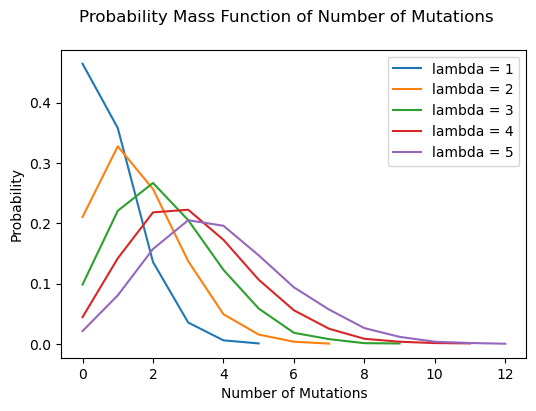

In [8]:
# plot probability mass function

pro_seq = translate_multiple(seq_list) # translate variants
n_mut_list = n_mutations(pro_seq) # calculate number of mutations
pmf_list = pmf_calc(n_mut_list) # calculate pmf

# plot
plt.figure(figsize=(6,4))
plt.suptitle('Probability Mass Function of Number of Mutations')

for i in range(len(lamb)):
    plt.plot(range(len(pmf_list[i])), pmf_list[i], label = 'lambda = ' + str(lamb[i]))

plt.xlabel('Number of Mutations')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Part e

It is important to know about stop codons. For each of the five libraries, calculate and display the fraction of sequences containing internal stop codons. 

<hr>

In [9]:
# calculate frac stop codons

n_stop_list = []

for i, s in enumerate(pro_seq): # 5 lambdas
    n_stop = 0
    for v in s: # 10000 variants
        if '*' in v:
            n_stop += 1
    n_stop_list.append(n_stop/10000)
    print('For \u03BB = {}, the fraction of stop codons is {}.'.format(lamb[i], n_stop/10000))

For λ = 1, the fraction of stop codons is 0.0434.
For λ = 2, the fraction of stop codons is 0.0853.
For λ = 3, the fraction of stop codons is 0.1237.
For λ = 4, the fraction of stop codons is 0.1587.
For λ = 5, the fraction of stop codons is 0.1994.


## Part f

Which of these libraries would you choose to screen? Why?

<hr>

I would choose to screen the $\lambda = 3$ library because it best balances library coverage and screening burden. At lower values of $\lambda$, a large portion of the 10,000 variants will have zero or one mutations. It is not efficient to generate and screen libraries with such low diversity. However, at higher values of $\lambda$

Sequences with premature stop codons will not fold properly and will automatically be removed by the screen. 

## Part g

For residues 10 and 50 in the parent amino acid sequence, plot (separately) the distribution of amino acid mutations generated at these positions in the $\lambda = 1$ substitution library (plot amino acid count vs amino acid). Then do the same for the $\lambda = 3$ and $\lambda = 5$ libraries. You should have a total of 6 plots. Only include frequencies of amino acid substitutions in your plots, not the frequency of the un-mutated parent amino acid.

*Hint*: Sometimes plotting with categorical variables in a given plotting package can be tricky. The code snippet below makes a plot with the amino acids as categorical variables on the x-axis using Bokeh.

In [10]:
import numpy as np
import bokeh.plotting
import bokeh.io

def plot_bokeh(n_mut, pos, title):

    bokeh.io.output_notebook()
    rg = np.random.default_rng()

    aa = list("ACDEFGHIKLMNPQRSTVWY*")

    # remove any amino acids that are not mutated
    aa = [a for i, a in enumerate(aa) if n_mut[i] != 0]
    n_mut = [n for n in n_mut if n != 0]
    
    p = bokeh.plotting.figure(
        frame_width=300,
        frame_height=150,
        x_axis_label="amino acid",
        y_axis_label="count",
        x_range=aa,
        title = title
    )

    p.circle(x=aa, y=n_mut)
    for amino_acid, y in zip(aa, n_mut):
        p.line(x=[amino_acid, amino_acid], y=[0, y])
        
    return p

You are free to adapt this code snippet in making your plots.

<hr>

In [11]:
lamb = [1, 3, 5]
positions = [10-1,  50-1]

# calc density of mutations
def calc_no_mutations(lib, pos):
    n_mut_dict = dict(zip(list("ACDEFGHIKLMNPQRSTVWY*"), np.zeros(21)))
    for i in range(len(lib)):
        if lib[i][pos] != og_pro_seq[pos]:
            n_mut_dict[lib[i][pos]] += 1
    return n_mut_dict

# plot
plots = []

for i in lamb:
    n10 = list(calc_no_mutations(pro_seq[i-1], positions[0]).values())
    n50 = list(calc_no_mutations(pro_seq[i-1], positions[1]).values())
    plots.append(plot_bokeh(n10, positions[0], 'Lambda = {i}, Positition = 10'.format(i = i)))
    plots.append(plot_bokeh(n50, positions[1], 'Lambda = {i}, Positition = 50'.format(i = i)))   

bokeh.io.show(bokeh.layouts.gridplot(plots, ncols=2)) 

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## Part h

What does this exercise tell us about the limitations of using error-prone PCR/random mutagenesis methods?

<hr>

Due to codon degeneracy, error-prone PCR can yeild a maximum of 9 mutations at any position. Since positions 10 and 50 are both A in the parent sequence, this maximum is reduced to 6 (D, G, P, S, T, V) for one mutation. At higher values of lambda, different amino acids can be introduced (ex. L or F for $\lambda = 5$), but these mutants only appear at very low counts. Therefore, error-prone PCR limits coverage of the sequence space and more focused libraries are needed to reduce coverage bias.

## Part i

Discuss the other randomization methods presented in [the Neylon, et al. paper](https://doi.org/10.1093/nar/gkh315) and if they overcome any of the limitations you mentioned above.

<hr>

Neylon et al. introduce random insertion and deletion (RID) and MAX randomization approaches to overcome the coverage bias associaed with e-PCR.

RID: insert or delete codons(s) (intead of single nucleotides) at random positions using Ce(IV), identity of inserted components is specified which eliminated codon bias

MAX randomization: incorporation of a specific subset of codons oligonucleotides (usually just 1 for each of he 20 AA)

## Part j

In the Arnold lab, using a reasonably high-throughput screen, a person can screen 1500 variants and expect to find 1-5 variants with significant improvement in the desired characteristic. Discuss what this means for directed evolution experiments and for natural protein evolution. 

<hr>

At best, the Arnold lab has a directed evolution success rate of 0.3%. Natural protein evolution processes must have a similar success rate. In nature, fitness is characterized by survial and reproductive rates. However, unlike natural protein evolution processes, fitness can be explicily defined in directed evolution campaigns. In explicitly defining fitness, the experimenter creates a quantitative measure to compare and rank variants. In each round of directed evolution, only the most successful mutations (for example, top 1-3) are kept and the process repeated until a  maxima is achieved. This process is known as a greedy uphill climb. Natural evolution cannot follow this process because it is agnostic of fitness rankings beyond inheritance. Therefore, directed evolution can evolve proteins with much higher explicit fitness on a significantly faster time scale than natural protein evolution.

<br />